In [2]:
import os
import pickle

import torch
import matplotlib.pyplot as plt

from nano_gpt.model import NanoGPT
from nano_gpt.utils import train_model
from nano_gpt.utils import generate
from nano_gpt.utils import load_model

from tokenizers.char_tokenizer import CharTokenizer
from tokenizers.bpe_tokenizer import BPETokenizer
from tokenizers.unigram_tokenizer import UnigramTokenizer

## Nano GPT Char Tokenizer

In [4]:
class CFG:
    batch_size = 32
    block_size = 384
    max_iters = 15_002
    eval_interval = 1000
    learning_rate = 3e-4
    device = 'cuda:1'
    eval_iters = 400
    n_embed = 384
    num_heads = 12
    num_layers = 12
    ffwd_coef = 4
    dropout = 0.25
    random_state = 42
    
    model_path = '../models/'
    model_name = 'nano_gpt_char'
    input_data = '../data/extended_input.txt'
    
    test_size = 0.1
    
torch.manual_seed(CFG.random_state)

In [8]:
with open(os.path.join(CFG.model_path, CFG.model_name, 'tokenizer.pickle'), 'rb') as f:
    tokenizer = pickle.load(f)
    
model = NanoGPT(tokenizer.vocab_size,
                CFG.block_size,
                CFG.n_embed,
                CFG.num_heads,
                CFG.dropout, 
                CFG.ffwd_coef,
                CFG.num_layers)

model, tokenizer = load_model(CFG.model_path, CFG.model_name, model)
model = model.to(CFG.device)

/home/dmitry/HDD_6TB/Documents/Nano-GPT-karpathy/code/nano_gpt/utils.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(model_dir, 'mo

### Generation

In [12]:
initial_context = "OTHELLO.\nHave you pray'd to-night, Desdemona?\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

OTHELLO.
Have you pray'd to-night, Desdemona?

DOGBERRY.
They are in Egliamond mean of chastity.

IAGO.
O, Desdemona demeans of many of a joy.

BARDOLPH.
You rag of mine own lazy prevaises for a sin-unlikely stomach,
and let me entertain you.

SUFFOLK.
[_Aside_.] Ay, I were ask’d.

OTHELLO.
Ay, sir, ambask’d within me, and would speech you:
tells you have. I have not been completers in your br


In [14]:
initial_context = "CHAMBERLAIN.\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

CHAMBERLAIN.
Acknowless crack me not, and told me at Henry’s.

HELENA.
Think Leonato’s , to break him from your to
French ill for his own lips if a woe,
That industrate doing itself. Proceed you too:
[_To Phoebe_.] I hear. Go ambaster a Pheaset.
Are you up as slay as virtuous conquest
Shrewing thither; being as i’ the greatest aspir’s,
And that it be possess’d 


In [16]:
initial_context = "OTHELLO.\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

OTHELLO.
He never arresorted by his spirit,
The lease injustion of his purpose,
Choose to his fear. A varley swords in thee.

EIGLAO.
Set it him out. Froth, know what Nymean shall.

ESCALUS.
By good father, Isabel!

ESCALUS.
My lord, ’tis he.

EDGAR.
’Tis not he, Heaven.

ESCALUS.
Fie, second! My lord! My heart is spoke
To my good will!

ELBOW.
Then, hear m


### Losses

In [18]:
with open(os.path.join(CFG.model_path, CFG.model_name, 'train_losses.pickle'), 'rb') as f:
    train_losses = pickle.load(f)
    
with open(os.path.join(CFG.model_path, CFG.model_name, 'val_losses.pickle'), 'rb') as f:
    val_losses = pickle.load(f)

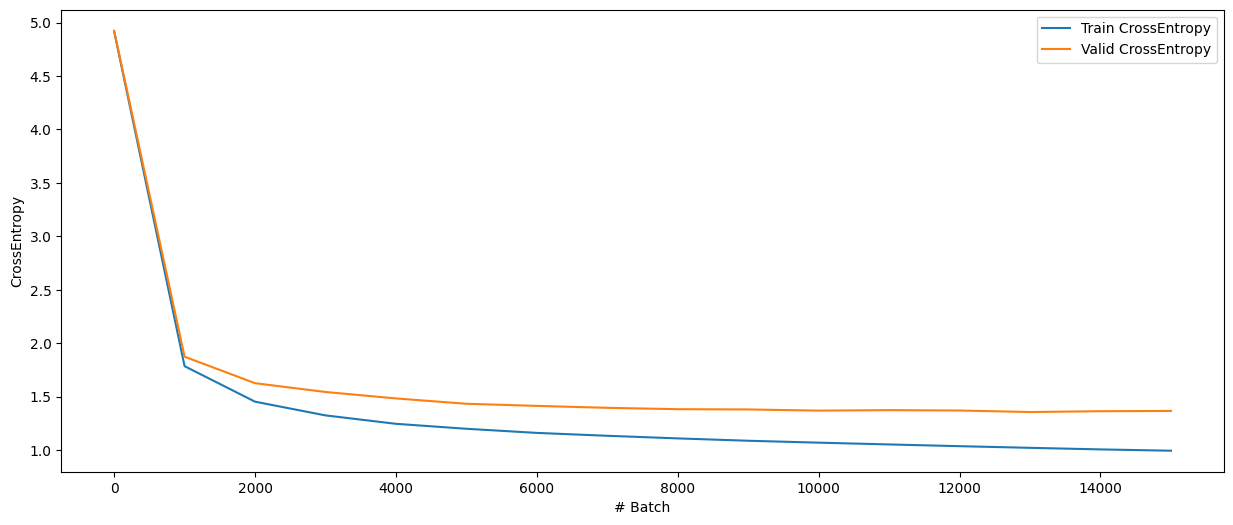

In [19]:
intervals = [i*CFG.eval_interval for i in range(len(train_losses))]

plt.figure(figsize=(15, 6))

plt.plot(intervals, train_losses, label='Train CrossEntropy')
plt.plot(intervals, val_losses, label='Valid CrossEntropy')
plt.xlabel('# Batch')
plt.ylabel('CrossEntropy')
plt.legend()

## Nano GPT BPE Tokenizer

In [16]:
class CFG:
    batch_size = 32
    block_size = 384
    max_iters = 15_002
    eval_interval = 1000
    learning_rate = 3e-4
    device = 'cuda:1'
    eval_iters = 400
    n_embed = 384
    num_heads = 12
    num_layers = 12
    ffwd_coef = 4
    dropout = 0.25
    random_state = 42
    vocab_size = 1_000
    
    model_path = '../models/'
    model_name = 'nano_gpt_bpe_1000'
    input_data = '../data/extended_input.txt'
    
    test_size = 0.1

In [21]:
with open(os.path.join(CFG.model_path, CFG.model_name, 'tokenizer.pickle'), 'rb') as f:
    tokenizer = pickle.load(f)
    
model = NanoGPT(tokenizer.vocab_size,
                CFG.block_size,
                CFG.n_embed,
                CFG.num_heads,
                CFG.dropout, 
                CFG.ffwd_coef,
                CFG.num_layers)

model, tokenizer = load_model(CFG.model_path, CFG.model_name, model)
model = model.to(CFG.device)

/home/dmitry/HDD_6TB/Documents/Nano-GPT-karpathy/code/nano_gpt/utils.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(model_dir, 'mo

### Generation

In [22]:
initial_context = "OTHELLO.\nHave you pray'd to-night, Desdemona?\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

100%|██████████| 895/895 [00:00<00:00, 358162.59it/s]


OTHELLO.
Have you pray'd to-night, Desdemona?

DESDEMONA.
A true, having my Leonato, had a death,
But rather cares serve and filk for a ken.
A moor! Honest thou wilt set thine eyes;
Stand what mayst I should wake a warm?

DESDEMONA.
Ay, and ordain, and having but a merry man’s ink,
Why should be spent to find out man knows:
[_To Marina._] ‘Yet gloving before ’twas, ’twas the reckoning;
He was leagued to smell before the peep!
Cleam. Come, for our niece! let her have one words?

DEMETRIUS.
Not for my life; it was.

[_Exit Caesar._]

OTHELLO.
Such uncle!

CAESAR.
Proceed I hie down, for wheresoe now
I saw the shore to suppress with the teyr.

[_Laspit and Frenchdoreto bloody Kate._]

How now, Kate!

OTHELLO.
Did what art thou? Look how far beating levy?

DESDEMONA.
I, pardon.

OTHELLO.
He needs out


In [23]:
initial_context = "CHAMBERLAIN.\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

100%|██████████| 895/895 [00:00<00:00, 815002.62it/s]


CHAMBERLAIN.
Bear.
We have sworn an honour is full of grief. God for ever hot
Before a revenge in valiant mood for our earth
The unity defeat upon the ship sleep of just
Must I take our virtue to the authority.
Bear these gods, and make in arm the world,
As I to consume upon a fiery earth,
Do, not dream more than he private. Peace,
Let craight cheerful and life upon me!

AUMERLE.
If thou art but a poor one of those
Beyond the whistening Anjou shame,
Why not to flatter if they were extreme
As heated to the Troy, beatished by
The palt’r bloody of the judgement,
Then have happily plucked thee up,
And perembled with instinct object, gifting,
Do make some sound conjurate hours of heart
With societies in sport, and some two men of board
Because I do but hand: for in commonwealth
A rather would the Trojan’s trumpets make,
No less than your son and good leave it hath
In his valour’s fitterness.

ALL.
I know’t; I’ll tell


In [25]:
initial_context = "OTHELLO.\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

100%|██████████| 895/895 [00:00<00:00, 888707.88it/s]


OTHELLO.
Not pacuous, lady. _

PEDANT.
Deckramed! O gentle, my lord;
Thou is not a great good reveller than the measure
Of enjoys, and of your son come not to hunt.
He gots this same yellow sadness doth now he water,
Unw’d soever you underfend her, elevening
How he grant they rede so sickle. Hereby:
Some words were mutely no loving out;
Noble, never knewed in the gallest breast,
But, immitted with a canker--praises
But three monstrous mannings of self-pious I
Will selled upon three follies. O, it is so.
For what a brood shall be our miseries shall our hope
pricon in pride of ship?
This we are diseasant to suffer ours,
The Ital only sent your fit talents.
Here comes our offices.

Enter Romans
LEUCESTER.
Look you, now.—Keep this night, with thy blood,
Which artifest to the mainter your son and live,
In good imple sacrifice of your ordinance,
If you thought him in a brother’s name of


### Losses

In [17]:
with open(os.path.join(CFG.model_path, CFG.model_name, 'train_losses.pickle'), 'rb') as f:
    train_losses = pickle.load(f)
    
with open(os.path.join(CFG.model_path, CFG.model_name, 'val_losses.pickle'), 'rb') as f:
    val_losses = pickle.load(f)

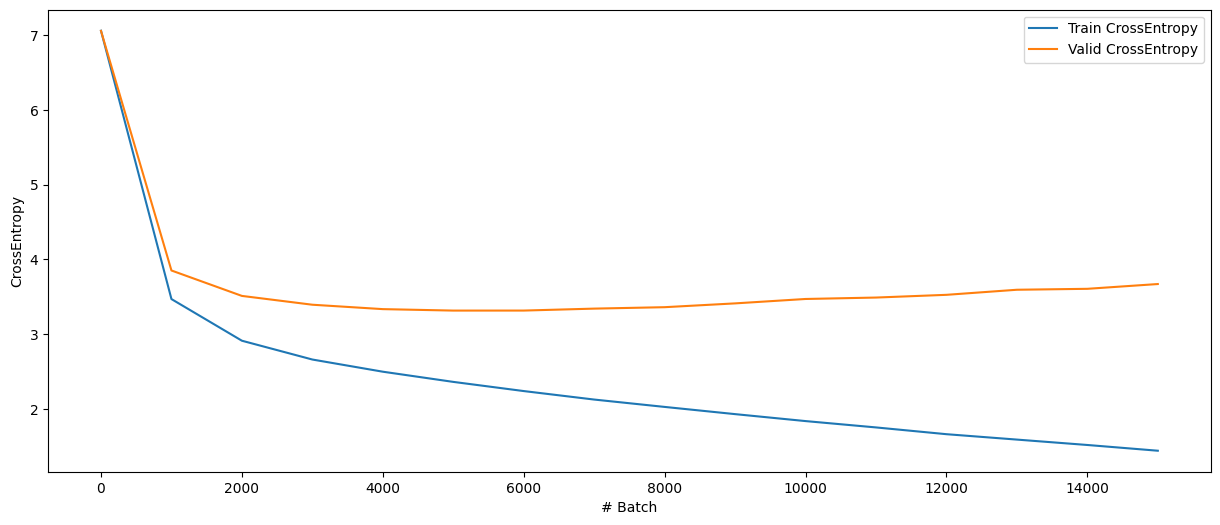

In [7]:
intervals = [i*CFG.eval_interval for i in range(len(train_losses))]

plt.figure(figsize=(15, 6))

plt.plot(intervals, train_losses, label='Train CrossEntropy')
plt.plot(intervals, val_losses, label='Valid CrossEntropy')
plt.xlabel('# Batch')
plt.ylabel('CrossEntropy')
plt.legend()

## Nano GPT, Unigram Tokenizer

In [8]:
class CFG:
    batch_size = 32
    block_size = 384
    max_iters = 15_002
    eval_interval = 1000
    learning_rate = 3e-4
    device = 'cuda:0'
    eval_iters = 400
    n_embed = 384
    num_heads = 12
    num_layers = 12
    ffwd_coef = 4
    dropout = 0.25
    random_state = 42
    vocab_size = 1_000
    initial_vocab_multiplier = 12
    
    model_path = '../models/'
    model_name = 'nano_gpt_unigram_1000'
    input_data = '../data/extended_input.txt'
    
    test_size = 0.1
    
torch.manual_seed(CFG.random_state)

In [30]:
with open(os.path.join(CFG.model_path, CFG.model_name, 'tokenizer.pickle'), 'rb') as f:
    tokenizer = pickle.load(f)
    
model = NanoGPT(tokenizer.vocab_size,
                CFG.block_size,
                CFG.n_embed,
                CFG.num_heads,
                CFG.dropout, 
                CFG.ffwd_coef,
                CFG.num_layers)

model, tokenizer = load_model(CFG.model_path, CFG.model_name, model)
model = model.to(CFG.device)

### Generation

In [37]:
initial_context = "OTHELLO.\nHave you pray'd to-night, Desdemona?\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

OTHELLO.
Have you pray'd to-night, Desdemona?

BEATRICE.
Yes, ye do the shrieken lady, and he hath laid up me in talk. But be not as
admir point, but troubled, as you repay, as you can, I, lay acheer in
his self-house.

LEONATO.
Why, how, brother? O God! a fool! you talk of rhlanders? Who is there?

FABIAN.
She will then dispose return a shirt in her; and will he see how Caesar earth, and
be two here. I hope the Prince has fallen enough, Balthaudlas?

BENEDICK.
Let me speak.

LEONATO.
But what talk you?

BEATRICE.
There is nothing matters, though particular men against ears, is enterly
pitiful sheen where they did; only, you are wear reward if you have
famish, you would desire yourself—leven, my lord,
Well he must be no answer.

HERO.
Why, sir, will thy tongue marry her?

BEATRICE.
Surely, with what tongue you heard else?

BEATRICE.
I would he see, but think truthly, for any man should play
well a cause of better.

LEONATO.
In such a doubt of an arren, of jealousy, that is a woman in C

In [38]:
initial_context = "CHAMBERLAIN.\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

CHAMBERLAIN.
It faints an el that the wings out long from the eye,—Ten may
alt particularly, which are infect to forgo their work with giving
of dies.

CASSIUS.
Cassius, does become them now.
Come, come, Caesar.

BRUTUS.
I hear have sworn not, warm. Till you lov’d them.
I’ll get the lady. Good brother, tell me God.
Is it a true? You, old thing you are ended dead.

BRUTUS.
Go to.

CASSIUS.
Come, Cassius, let’s hiddle; where they hear it.
Here comes my chief hither; and ’tis to fear.
But of this, let it strive, let my last doom.

CASSIUS.
Bet good, Caesar, and you too.

CASSIUS.
Dead them, welcome. Let them accepa, we have.

[_A, but leading upon._]

CAESAR.
You sent in the heat of Antony.
The city and room is not well; why not such,
But alway, the greater, and the ass as he stands,
In every poll ladies now did such prolog.

ANTONY.
[_Ket_.] Cassius is Cassius: the peace we sp


In [39]:
initial_context = "OTHELLO.\n"
res = generate(initial_context, model, tokenizer, 350, CFG.device)

print(res[1])

OTHELLO.
Geliver not my Cgpeur, but for shame me some devilish honour ye had
disamation that hath one years for wot
To sure so only and dearly leave-morrow. Is’t true?
And see that As honourable lords in hell? Wilt thou dismiss
When the strongest elements to beloved, yea, and declined?

FIRST SOLDIER.
He did commend; and she was well known the party of thine.

SECOND SOLDIER.
A gentleman that will not bring forth to his ance?

ANTONY.
What, and it is strange, with a rain senseless black tree, roar’d, there
’Twill all his blade senses in his brain.

FIRST SOLDIER.
This is no matter enough.

SECOND SOLDIER.
What’s the matter?

SECOND SOLDIER.
’Tis to be ended.

ANTONY.
Faith, he is banished, nought but upon that words should be
all Serges; and he that our land.

ANTONY.
Not wondrous ill to, we parted then devours all.
Gentlemen not those men.—Did not onceived this strife of you?
Think you ’twas the traitor of our


### Losses

In [9]:
with open(os.path.join(CFG.model_path, CFG.model_name, 'train_losses.pickle'), 'rb') as f:
    train_losses = pickle.load(f)
    
with open(os.path.join(CFG.model_path, CFG.model_name, 'val_losses.pickle'), 'rb') as f:
    val_losses = pickle.load(f)

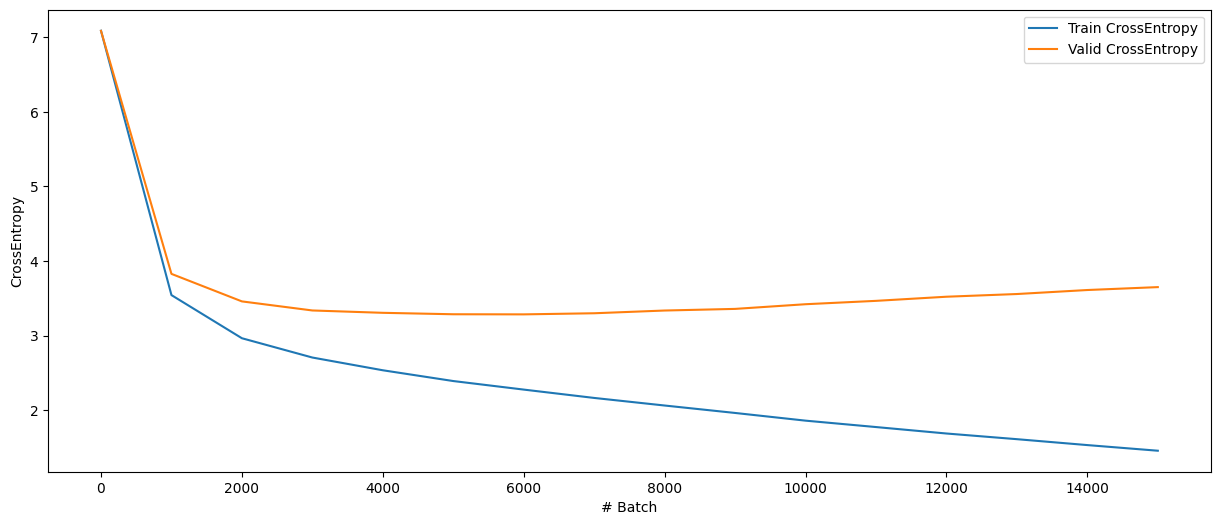

In [10]:
intervals = [i*CFG.eval_interval for i in range(len(train_losses))]

plt.figure(figsize=(15, 6))

plt.plot(intervals, train_losses, label='Train CrossEntropy')
plt.plot(intervals, val_losses, label='Valid CrossEntropy')
plt.xlabel('# Batch')
plt.ylabel('CrossEntropy')
plt.legend()